In [1]:
import os, sys, re

for path in sys.path:
    if re.match(".*/site-packages$", path):
        os.environ["GDAL_DATA"] = path + "/fiona/gdal_data"
        os.environ["PROJ_LIB"] = path + "/fiona/proj_data"

In [2]:
from pprint import pprint

In [3]:
import fiona

In [4]:
from shapely.geometry import *

# Features "from scratch"

In [5]:
import csv

Die Daten in `data/airports.dat` sind von https://openflights.org/data.html.

Ich habe den Header nachträglich eingefügt, um das Laden zu vereinfachen. Und den South Pole Station Airport habe ich gelöscht, es sonst bei der Transformation Probleme gab. ;o)

In [6]:
with open("data/airports.dat") as csvfile:
    reader = csv.DictReader(csvfile)
    
    for row in reader:
        print(row['Name'], row['Latitude'], row['Longitude'])

Goroka Airport -6.081689834590001 145.391998291
Madang Airport -5.20707988739 145.789001465
Mount Hagen Kagamuga Airport -5.826789855957031 144.29600524902344
Nadzab Airport -6.569803 146.725977
Port Moresby Jacksons International Airport -9.443380355834961 147.22000122070312
Wewak International Airport -3.58383011818 143.669006348
Narsarsuaq Airport 61.1604995728 -45.4259986877
Godthaab / Nuuk Airport 64.19090271 -51.6781005859
Kangerlussuaq Airport 67.0122218992 -50.7116031647
Thule Air Base 76.5311965942 -68.7032012939
Akureyri Airport 65.66000366210938 -18.07270050048828
Egilsstaðir Airport 65.2833023071289 -14.401399612426758
Hornafjörður Airport 64.295601 -15.2272
Húsavík Airport 65.952301 -17.426001
Ísafjörður Airport 66.05809783935547 -23.135299682617188
Keflavik International Airport 63.985000610352 -22.605600357056
Patreksfjörður Airport 65.555801 -23.965
Reykjavik Airport 64.1299972534 -21.9405994415
Siglufjörður Airport 66.133301 -18.9167
Vestmannaeyjar Airport 63.424301147

Sandnessjøen Airport (Stokka) 65.956802368164 12.468899726868
Tromsø Airport 69.68329620361328 18.918899536132812
Sandefjord Airport, Torp 59.1866989136 10.258600235
Trondheim Airport Værnes 63.4578018 10.9239998
Stavanger Airport Sola 58.876701354 5.6377801895
Babice Airport 52.26850128173828 20.910999298095703
Gdańsk Lech Wałęsa Airport 54.377601623535156 18.46619987487793
Kraków John Paul II International Airport 50.077702 19.7848
Muchowiec Airport 50.23809814453125 19.03420066833496
Katowice International Airport 50.4743 19.08
Mielec Airport 50.32229995727539 21.462099075317383
Poznań-Ławica Airport 52.421001434299995 16.8262996674
Rzeszów-Jasionka Airport 50.1100006104 22.0189990997
Szczecin-Goleniów "Solidarność" Airport 53.584701538100006 14.902199745199999
Redzikowo Air Base 54.47890090942383 17.107500076293945
Swidwin Military Air Base 53.790599823 15.826299667399999
Warsaw Chopin Airport 52.1656990051 20.967100143399996
Copernicus Wrocław Airport 51.1026992798 16.885799408
Zi

Orange-Caritat (BA 115) Air Base 44.140499114990234 4.866720199584961
Perpignan-Rivesaltes (Llabanère) Airport 42.74039840698242 2.8706700801849365
Le Castellet Airport 43.252498626708984 5.785190105438232
Alès-Deaux Airport 44.069698 4.14212
Montpellier-Méditerranée Airport 43.57619857788086 3.96301007270813
Béziers-Vias Airport 43.32350158691406 3.3538999557495117
Avignon-Caumont Airport 43.90729904174805 4.901830196380615
Salon-de-Provence (BA 701) Air Base 43.60639953613281 5.109250068664551
Lézignan-Corbières Airport 43.17580032348633 2.7341699600219727
Mende-Brenoux Airport 44.50210189819336 3.532819986343384
Carpentras Airport 44.02980041503906 5.078060150146484
Avord (BA 702) Air Base 47.053299 2.6325
Paris Beauvais Tillé Airport 49.45439910888672 2.1127800941467285
Châteaudun (BA 279) Air Base 48.058102 1.37662
Saumur-Saint-Florent Airport 47.256802 -0.115142
Évreux-Fauville (BA 105) Air Base 49.02870178222656 1.2198599576950073
Le Havre Octeville Airport 49.53390121459961 0.0

Golfito Airport 8.654009819030762 -83.18219757080078
Guapiles Airport 10.2172002792 -83.79699707030001
Daniel Oduber Quiros International Airport 10.5933 -85.544403
Los Chiles Airport 11.035300254821777 -84.70610046386719
Limon International Airport 9.95796012878418 -83.02200317382812
Nosara Airport 9.976490020750001 -85.65299987790002
Juan Santamaria International Airport 9.993860244750977 -84.20880126953125
Pandora Airport 9.732170104980469 -82.98320007324219
Palmar Sur Airport 8.951029777526855 -83.46859741210938
Quepos Managua Airport 9.443160057067871 -84.12979888916016
Santa Clara De Guapiles Airport 10.288299560546875 -83.7135009765625
San Vito De Java Airport 8.826109886169434 -82.95890045166016
Monseñor Óscar Arnulfo Romero International Airport 13.4409 -89.055702
Ilopango International Airport 13.69950008392334 -89.11990356445312
Les Cayes Airport 18.271099090576172 -73.78829956054688
Cap Haitien International Airport 19.733 -72.194702
Jacmel Airport 18.241100311279297 -72.51

Inca Manco Capac International Airport -15.467100143432617 -70.158203125
Ilo Airport -17.69499969482422 -71.34400177001953
Las Palmas Air Base -12.16069984436 -76.998901367188
Capitan FAP Pedro Canga Rodriguez Airport -3.55253005027771 -80.38140106201172
Moises Benzaquen Rengifo Airport -5.893770217895508 -76.11820220947266
Collique Airport -11.92870044708252 -77.06109619140625
Chachapoyas Airport -6.201809883117676 -77.8561019897461
Coronel FAP Francisco Secada Vignetta International Airport -3.7847399711608887 -73.30879974365234
Rodríguez Ballón International Airport -16.3411006927 -71.5830993652
Capitán FAP Leonardo Alvariño Herr Airport -11.128600120544434 -75.35050201416016
Capitan FAP Carlos Martinez De Pinillos International Airport -8.08141040802002 -79.10880279541016
Capitán FAP Renán Elías Olivera International Airport -13.74489974975586 -76.22029876708984
Cadete FAP Guillermo Del Castillo Paredes Airport -6.508739948272705 -76.37319946289062
Coronel FAP Carlos Ciriani Santa 

Fresno Yosemite International Airport 36.77619934082031 -119.71800231933594
Vero Beach Regional Airport 27.6556 -80.417901
Imperial County Airport 32.834201812699995 -115.57900238
Nashville International Airport 36.1245002746582 -86.6781997680664
Laredo International Airport 27.543800354003906 -99.46160125732422
Elmendorf Air Force Base 61.250999450683594 -149.8070068359375
Ralph Wien Memorial Airport 66.88469696 -162.598999
Altoona Blair County Airport 40.29639816 -78.31999969
Dyess Air Force Base 32.4207992554 -99.854598999
South Arkansas Regional At Goodwin Field 33.22100067138672 -92.81330108642578
La Guardia Airport 40.77719879 -73.87259674
Tallahassee Regional Airport 30.396499633789062 -84.35030364990234
Dupage Airport 41.90779877 -88.24859619
Waco Regional Airport 31.611299514770508 -97.23049926757812
Augusta State Airport 44.320598602299995 -69.7973022461
Hillsboro Municipal Airport 32.08349991 -97.09719849
Jacksonville Naval Air Station (Towers Field) 30.2358 -81.680603
Mc Ke

Tsiroanomandidy Airport -18.759677 46.054065
Ambatondrazaka Airport -17.795378 48.442583
Port Bergé Airport -15.584286 47.623587
Ambanja Airport -13.645705 48.459427
Soalala Airport -16.10169 45.358837
Mampikony Airport -16.0722693402 47.644164562200004
Nasa Shuttle Landing Facility Airport 28.614999771118164 -80.69450378417969
Mandritsara Airport -15.833049 48.833284
Manja Airport -21.426105 44.316509
Catumbela Airport -12.4792 13.4869
Dundo Airport -7.400889873504639 20.818500518798828
Ngjiva Pereira Airport -17.0435009003 15.683799743700002
Namibe Airport -15.261199951171875 12.14680004119873
Koulamoutou Mabimbi Airport -1.1846100091934 12.441300392151
Mouilla Ville Airport -1.845139980316162 11.056699752807617
Tchibanga Airport -2.8499999046325684 11.017000198364258
Chimoio Airport -19.15130043029785 33.42900085449219
Sarh Airport 9.14444 18.374399
Club Makokola Airport -14.306900024414062 35.13249969482422
Luderitz Airport -26.687400817871094 15.242899894714355
Ondangwa Airport -1

Gunnison Crested Butte Regional Airport 38.53390121 -106.9329987
Xi'an Xiguan Airport 34.376701 109.120003
Zamperini Field 33.803398132324 -118.33999633789
Manistee Co Blacker Airport 44.2723999 -86.24690247
Charlotte County Airport 26.92020035 -81.9905014
Northern Aroostook Regional Airport 47.2854995728 -68.31279754639999
Chautauqua County-Jamestown Airport 42.15340042 -79.25800323
La Macaza / Mont-Tremblant International Inc Airport 46.409400939899996 -74.7799987793
Lake Cumberland Regional Airport 37.053398132299996 -84.6158981323
Shenandoah Valley Regional Airport 38.2638015747 -78.8964004517
Devils Lake Regional Airport 48.11420059 -98.90879822
Dickinson Theodore Roosevelt Regional Airport 46.7974014282 -102.802001953
Sidney - Richland Regional Airport 47.706902 -104.193001
Chadron Municipal Airport 42.837600708 -103.095001221
Alliance Municipal Airport 42.0531997681 -102.804000854
Mc Cook Ben Nelson Regional Airport 40.20629883 -100.5920029
The Florida Keys Marathon Airport 24.7

Lingling Airport 26.338661 111.610043
Lošinj Island Airport 44.5657997131 14.3930997849
Onslow Airport -21.668300628662 115.1129989624
Theodore Airport -24.99329948425293 150.09300231933594
Williamson Sodus Airport 43.23469925 -77.1210022
Fairoaks Airport 51.3480987549 -0.558888971806
Boulder Municipal Airport 40.0393981934 -105.225997925
Neustadt-Glewe Airport 53.35972213745117 11.615278244018555
Goetsenhoven Air Base 50.781700134277344 4.957779884338379
Tutow Airport 53.92194366455078 13.218889236450195
Bremgarten Airport 47.9027786255 7.6177778244
Bitburg Airport 49.945278 6.565
Palo Alto Airport of Santa Clara County 37.461101532 -122.114997864
Ust-Nera Airport 64.550003051758 143.11500549316
Letiště Vysoké Mýto 49.926899 16.185801
Spa (la Sauvenière) Airport 50.48249816894531 5.910299777984619
Falcon Field 33.4608001709 -111.727996826
Coolidge Municipal Airport 32.9359016418457 -111.427001953125
Cottonwood Airport 34.7299995422 -112.035003662
Suarlée Airport 50.487999 4.76892
Kiew

Tashkent East Airport 41.31269836425781 69.39140319824219
Myachkovo Airport 55.5600013733 37.9850006104
Tretyakovo Airport 54.904998779299994 39.02666854859999
Yermolino Airport 55.2283325195 36.6083335876
Inta Airport 66.0548324584961 60.110321044921875
Izhma Airport 65.03170013427734 53.970001220703125
Borisoglebskoye Airport 55.86669921875 49.13330078125
Zhigansk Airport 66.7965011597 123.361000061
Maksimovka Airport 54.83000183105469 56.16830062866211
Buguruslan Severny Airport 53.71839904789999 52.3718986511
Bezymyanka Airfield 53.220001220703125 50.32500076293945
Ratnagiri Airport 17.013599 73.327797
Hingurakgoda Air Force Base 8.04981 80.9814
Kazi Nazrul Islam Airport 23.6225 87.243
Ambala Air Force Station 30.368099212646484 76.81670379638672
Sirsa Air Force Station 29.56060028076172 75.006103515625
Udhampur Air Force Station 32.902198791503906 75.15619659423828
Sri Sathya Sai Airport 14.1492996216 77.7910995483
Meiktila Air Base 20.88640022277832 95.89279174804688
Changi Air B

In [7]:
from collections import OrderedDict

airport_schema = {
    'geometry': 'Point',
    'properties': OrderedDict([
        #("Airport ID", 'int'),
        ("Name", 'str'),
        ("City", 'str'),
        ("Country", 'str'),
        ("IATA", 'str'),
        ("ICAO", 'str'),
        #("Latitude", 'float'),
        #("Longitude", 'float'),
        ("Altitude", 'float'),
        #("Timezone", 'str'),
        #("DST", 'str'),
        #("Tz database time zone", 'str'),
        #("Type", 'str'),
        #("Source", 'str')
    ])
}

In [8]:
airports = []

with open("data/airports.dat") as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        
        airport = {
            'geometry': {
                'type': 'Point',
                'coordinates': (
                    float(row['Longitude']),  # andersrum als spalten ;)
                    float(row['Latitude'])
                )
            },
            'properties': OrderedDict([
                #("Airport ID", row['Airport ID']),
                ("Name", row['Name']),
                ("City", row['City']),
                ("Country", row['Country']),
                ("IATA", row['IATA']),
                ("ICAO", row['ICAO']),
                #("Latitude", row['Latitude']),
                #("Longitude", row['Longitude']),
                ("Altitude", float(row['Altitude'])),
                #("Timezone", row['Timezone']),
                #("DST", row['DST']),
                #("Tz database time zone", row['Tz database time zone']),
                #("Type", row['Type']),
                #("Source", row['Source'])
            ])
        }
        
        airports.append(airport)

In [9]:
airports_geometries = [shape(f['geometry']) for f in airports]

In [10]:
#GeometryCollection((airports_geometries))

# Koordinaten transformieren und die ausserhalb Europas rausfiltern

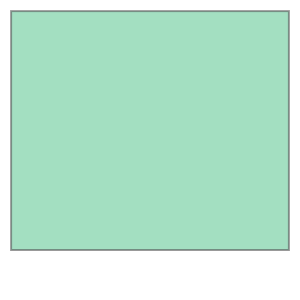

In [11]:
europe_extents = box(2.5e6, 1.2e6, 7.5e6, 5.5e6)
europe_extents

In [12]:
from fiona.transform import transform_geom
from fiona.crs import from_epsg

In [13]:
airports_geometries_3035 = []

for geom in airports_geometries:
    geom_3035 = shape(
        transform_geom(
            from_epsg(4326),
            from_epsg(3035),
            mapping(geom)
        )
    )
    
    airports_geometries_3035.append(geom_3035)

In [14]:
#GeometryCollection((airports_geometries_3035))

In [15]:
airports_geometries_3035[0].wkt

'POINT (13407016.15672053 9603476.203104271)'

In [16]:
airports_geometries[0].wkt

'POINT (145.391998291 -6.081689834590001)'

In [17]:
airports_in_europe = []
for airport in airports_geometries_3035:
    if airport.within(europe_extents):
        airports_in_europe.append(airport)

In [18]:
#GeometryCollection(airports_geometries_europe)

In [19]:
len(airports_in_europe)

1769

# Daten für andere Notebooks zur Verfügung stellen

In [20]:
%store airports_geometries_3035
%store airports

Stored 'airports_geometries_3035' (list)
Stored 'airports' (list)


# In GeoPackage schreiben

## Die originalen Daten (WGS84)

In [21]:
with fiona.open("airports.gpkg", "w",
                schema=airport_schema, crs=from_epsg(4326),
                driver="GPKG"
               ) as sink:
    
    for airport in airports:
        sink.write(airport)

## Die originalen Features mit den transformierten Geometrien

In [22]:
with fiona.open("airports_3035.gpkg", "w",
                schema=airport_schema, crs=from_epsg(3035),
                driver="GPKG"
               ) as sink:
    
    for airport, geometry in zip(airports, airports_geometries_3035):
        airport['geometry'] = mapping(geometry)
        sink.write(airport)